# Первая часть. Исследование

Импортируем нужные библиотеки, прочитаем тестовый датасет, его рандомные строчки, информацию о датасете и обозначим численные и категориальные колонки.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:

num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]


cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'


In [ ]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2419,38,78.95,2862.55,Male,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),0
1573,8,20.85,161.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3269,7,44.65,322.5,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
971,29,103.95,2964.8,Male,1,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
2512,33,58.45,1955.4,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Mailed check,0
1480,30,85.45,2509.95,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,0
4044,67,70.90,4677.1,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0
1237,56,19.55,1080.55,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
624,62,84.95,5150.55,Female,0,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,0
4349,13,84.60,1115.2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

`Nan` значений в выборке не имеем.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Здесь можно заметить, что колонка TotalSpent не соответствует численному классу, значит может он иметь строки вместо чисел.

In [ ]:
(data==' ').sum()# we have 9 empty strings in TotalSpent like I said

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

TotalSpent имеет пустые строки, заменим их на "1".

In [ ]:
data=data.replace(to_replace = " ",value =1)
data['TotalSpent']=data['TotalSpent'].astype(float)

Теперь датасет готов к анализу и дальнейшей обработке.

## Анализ данных



Выведем гистограммы распределения численных признаков нашего датасета.

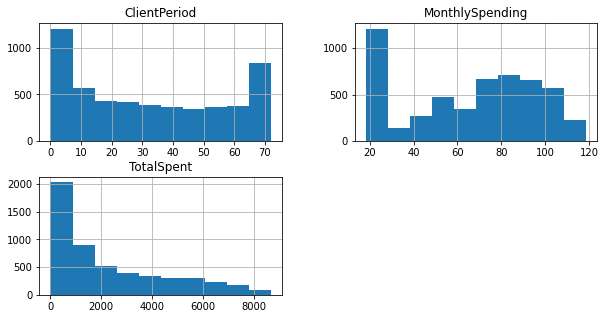

In [ ]:
data[num_cols].hist(figsize=(10,5))
None

Выведем круговые диаграммы распределения наших категориальных признаков.

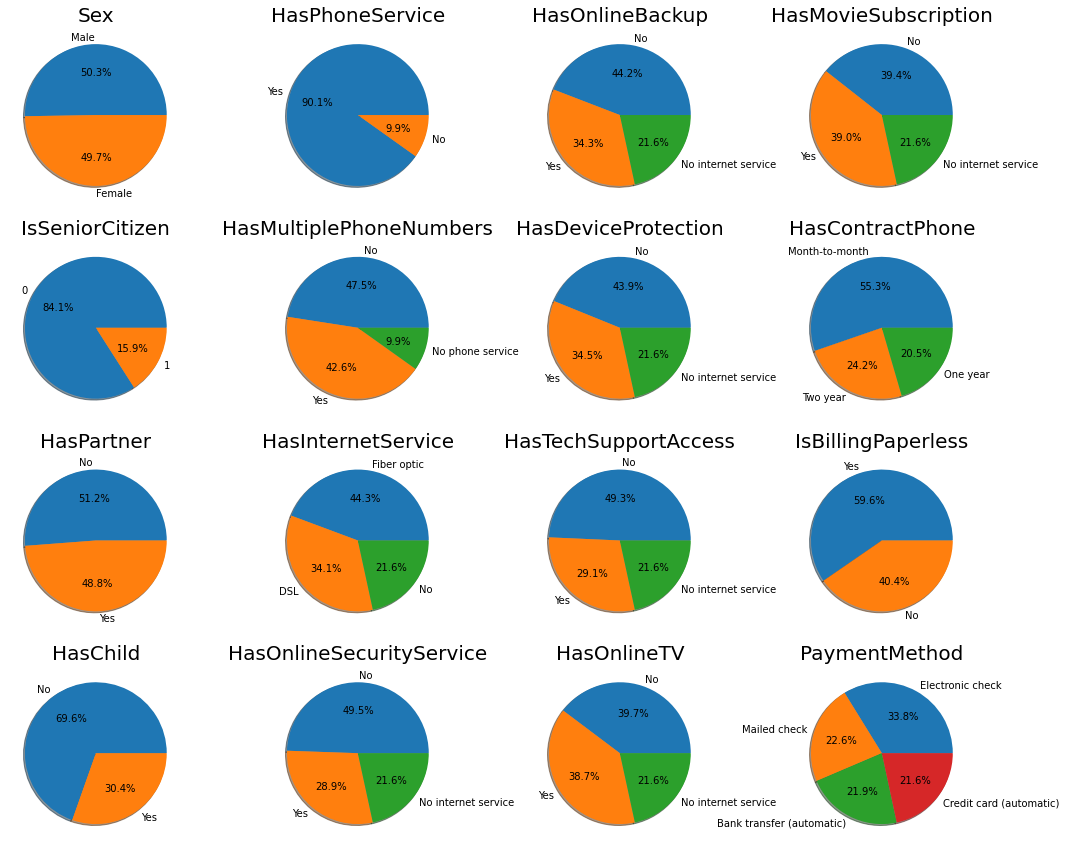

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(18, 15))

iter=0
for i in range(4):
    for j in range(4):
        category=cat_cols[iter]

        values=data[category].value_counts()
        label=list(values.index)

        info=[]
        for k in values:
            info.append(round(k/data[category].size*100,2))

        axs[j][i].pie(info,labels=label,shadow = True,radius=1,autopct='%1.1f%%')
        axs[j][i].set_title(category,pad='5.0',fontsize=20,fontweight='roman')
        iter+=1
plt.show()


None

Узнаем корреляцию числовых признаков.

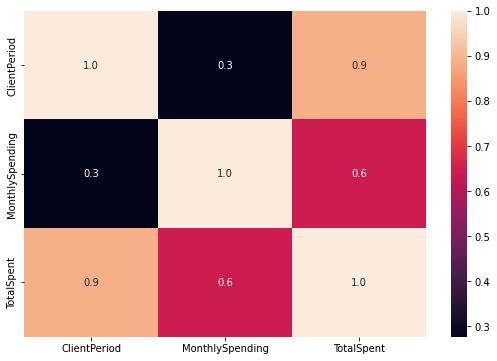

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(data[num_cols].corr(method='spearman'),annot=True,fmt=".1f")
None

Корреляция вполне логичная. Чем больше клиент у телекома - тем больше и потраченных денег на услуги, и чем больше месячная трата на услуги - тем больше всё тех же потраченных финансов на услуги.

Визуализируем распределение нашей целевой переменной `"Churn"`.

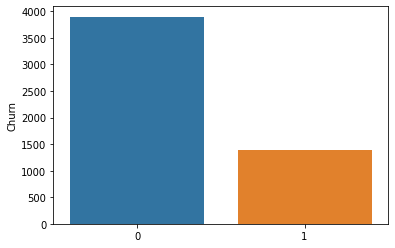

In [ ]:
values=data['Churn'].value_counts()
label=list(values.index)

sns.barplot(x=label, y=values)
None

По гистограмме можно увидеть, что преобладает класс `"0"`. Значений `0` класса почти в 3 раза больше, чем `1` класса. Баланс классов оставляет желать лучшего. Это может накладывать ограничения на использование метрик, но в нашем случае `ROC-AUC` хорошо справится с этим, также деревья решений хорошо справляются с такой работой.

## Применение линейных моделей (3 балла)



Импорт нужных библиотек из `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve

Создадим массив `X` с отнормированными числовыми признаками и примененным One-Hot-Encoding.

In [ ]:
dummy_f=pd.get_dummies(data[cat_cols])

X=pd.concat([data[num_cols],dummy_f],axis=1)

X[num_cols]=StandardScaler().fit_transform(data[num_cols])

Разделим выборку на тренировочную и тестовую.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,data[target_col], test_size=0.2, random_state=42)

Создадим экземпляр LogisticRegression и обучим его с применением GridSearchCV и подбором различных параметров

In [ ]:
params_logreg = {
'max_iter': [100,200,300,350,400],
'C': [100, 10, 1, 0.1, 0.01, 0.001], 
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


tuned_logreg=GridSearchCV(LogisticRegression(),params_logreg,scoring='roc_auc',n_jobs=-1)

tuned_logreg.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 300, 350, 400],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

Выведем лучшие параметры и значения для нашей логистической регрессии.

In [ ]:
tuned_logreg.best_params_

{'C': 100, 'max_iter': 350, 'solver': 'saga'}

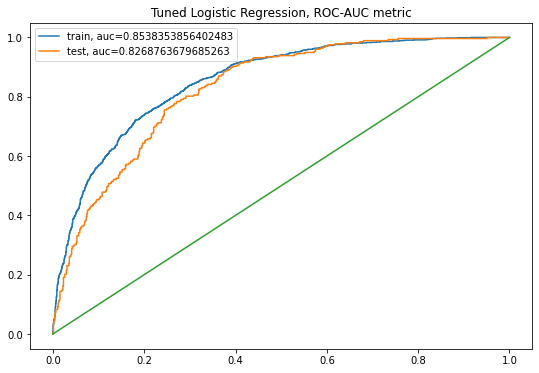

In [ ]:
logreg_tuned_test=tuned_logreg.predict_proba(X_test)[:,1]
logreg_tuned_train=tuned_logreg.predict_proba(X_train)[:,1]

plt.figure(figsize=(9,6))


fpr, tpr, thresh = roc_curve(y_train, logreg_tuned_train)
auc = roc_auc_score(y_train,logreg_tuned_train)
plt.plot(fpr,tpr,label="train, auc="+str(auc))


fpr, tpr, thresh = roc_curve(y_test, logreg_tuned_test)
auc = roc_auc_score(y_test, logreg_tuned_test)
plt.plot(fpr,tpr,label="test, auc="+str(auc))
plt.title('Tuned Logistic Regression, ROC-AUC metric')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.legend(loc=0)

None

## Применение градиентного бустинга (2 балла)


In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier

Разделим выборку на обучающую и тестовую, но не не нормируем числовые признаки и не применяем One-Hot-Encoding т.к. для catboost это не нужно.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1),data[target_col], test_size=0.2, random_state=10)

Произведем градиентный бустинг без перебора гиперпараметров.

In [ ]:
basic_boost = CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',task_type="GPU",silent=True)
basic_boost.fit(X_train,y_train)

Узнаем результаты этого бустинга.

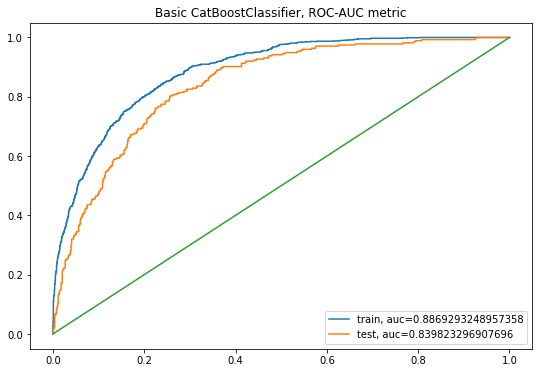

In [ ]:
predictproba_test=basic_boost.predict_proba(X_test)[:,1]
predictproba_train=basic_boost.predict_proba(X_train)[:,1]


plt.figure(figsize=(9,6))


fpr, tpr, thresh = roc_curve(y_train, predictproba_train)
auc = roc_auc_score(y_train,predictproba_train)
plt.plot(fpr,tpr,label="train, auc="+str(auc))


fpr, tpr, thresh = roc_curve(y_test, predictproba_test)
auc = roc_auc_score(y_test, predictproba_test)
plt.plot(fpr,tpr,label="test, auc="+str(auc))
plt.title('Basic CatBoostClassifier, ROC-AUC metric')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.legend(loc=0)

None

Подберем подходящие гиперпараметры для `boostmodel` через `grid_search`.

In [ ]:
params = {
'max_depth': [3], 
'subsample': np.linspace(0.55, 0.6, 10), 
'l2_leaf_reg': np.linspace(3, 3.5,5), 
'random_strength': np.linspace(1.1, 1.2, 5), 
'min_data_in_leaf': [5], 
'learning_rate': np.linspace(0.01, 0.2, 10)
}

In [ ]:
boostmodel=CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',task_type="GPU",silent=True)
boostmodel.grid_search(params,X_train,y_train)

Узнаем лучшие параметры.

In [ ]:
print('Лучшие параметры:',boostmodel.get_params())

Обучим модель на лучших параметрах.

In [ ]:
best_params= {
'iterations': 200, 
'ctr_leaf_count_limit': 18446744073709551615, 
'one_hot_max_size': 2,  
'l2_leaf_reg': 3.375, 
'random_strength': 1.1111111640930176, 
'subsample': 0.5833333134651184, 
'random_seed': 777, 
'depth': 3,
'border_count': 254,
'min_data_in_leaf': 5, 
'learning_rate': 0.20000000298023224, 
'leaf_estimation_iterations': 10,
    }


boostmodel_best=CatBoostClassifier(cat_features=cat_cols,
                                   eval_metric='AUC:hints=skip_train~false',**best_params)
boostmodel_best.fit(X_train,y_train)

Представим полученные результаты метрики с модели `boostmodel_best`.

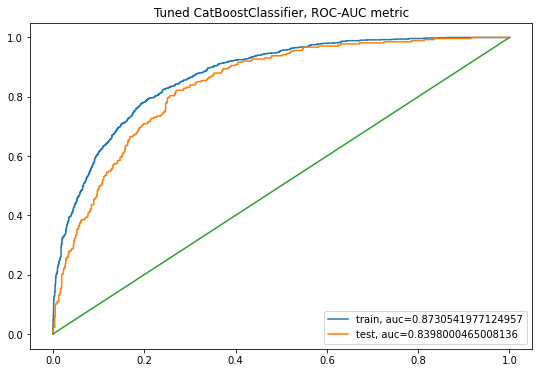

In [ ]:
predictproba_tuned_test=boostmodel_best.predict_proba(X_test)[:,1]
predictproba_tuned_train=boostmodel_best.predict_proba(X_train)[:,1]

plt.figure(figsize=(9,6))


fpr, tpr, thresh = roc_curve(y_train, predictproba_tuned_train)
auc = roc_auc_score(y_train,predictproba_tuned_train)
plt.plot(fpr,tpr,label="train, auc="+str(auc))


fpr, tpr, thresh = roc_curve(y_test, predictproba_tuned_test)
auc = roc_auc_score(y_test, predictproba_tuned_test)
plt.plot(fpr,tpr,label="test, auc="+str(auc))
plt.title('Tuned CatBoostClassifier, ROC-AUC metric')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.legend(loc=0)

None

# Предсказания

Прочитаем файл с тестовой выборкой(`test`) и файл `submission`.

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')


Не забываем применить ту же самую обработку датасета, что и для тренировочной выборки(`data`).

In [ ]:
X_test=X_test.replace(to_replace = " ",value =1)
X_test['TotalSpent']=X_test['TotalSpent'].astype(float)

Запишем результаты `predict_proba` тестовой выборки с лучшей модели(`boostmodel_best`) в файл `submission`.


In [ ]:
submission['Churn'] = boostmodel_best.predict_proba(X_test)[:,1] 
submission.to_csv('./my_submission.csv',index=False)

Финальный score на kaggle - 0.85183